## Hovmöller plot of ssh along the coast

1. Find lon index of first cell that is not land from east to west for each lat.
2. Subtract one to the lon index found to make sure it is water.
3. Save index in a lon indices array.
4. Plot hovmoller diagram using all lats and lon index array.

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 100
nt = 720

In [4]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

### 1. Find lon index of first water point from east to west for each lat

Find cells along lat where hFacC is 1.

In [5]:
lon_inds = np.argmax(np.squeeze(hFacCSVB[0,:,::-1].data), axis=1)

Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 6.00 m
Depth at cell is 8.00 m
Depth at cell is 6.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 10.00 m
Depth at cell is 6.00 m
Depth at cell is 20.00 m
Depth at cell is 14.60 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 12.20 m
Depth at cell is 6.00 m
Depth at cell is 4.00 m
Depth at cell is 12.20 m
Depth at cell is 8.00 m
Depth at cell is 4.00 m
Depth at cell is 8.00 m
Depth at cell is 10.00 m
Depth at cell is 8.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 4.00 m
Depth at cell is 14.60 m
Depth at cell is 8.00 m
Depth at cell is 6.00 m
Depth at cell is 6.00 m
Depth at cell is 8.00 m
Depth at cell is 12.20 m
Depth at cell is 4.00 m
Depth at

Depth at cell is 12.20 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 8.00 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 10.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 10.00 m
Depth at cell is 8.00 m
Depth at cell is 17.20 m
Depth at cell is 6.00 m
Depth at cell is 12.20 m
Depth at cell is 10.00 m
Depth at cell is 4.00 m
Depth at cell is 10.00 m
Depth at cell is 14.60 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 8.00 m
Depth at cell is 6.00 m
Depth at cell is 10.00 m
Depth at cell is 12.20 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 12.20 m
Depth at cell is 4.00 m
Depth at cell is 6.00 m
Depth at cell is 8.00 m
Depth at cell is 10.00 m
Depth at cell is 10.00 m
Depth at cell is 12.20 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 4.00 m
Depth at cell is 12.20 m
D

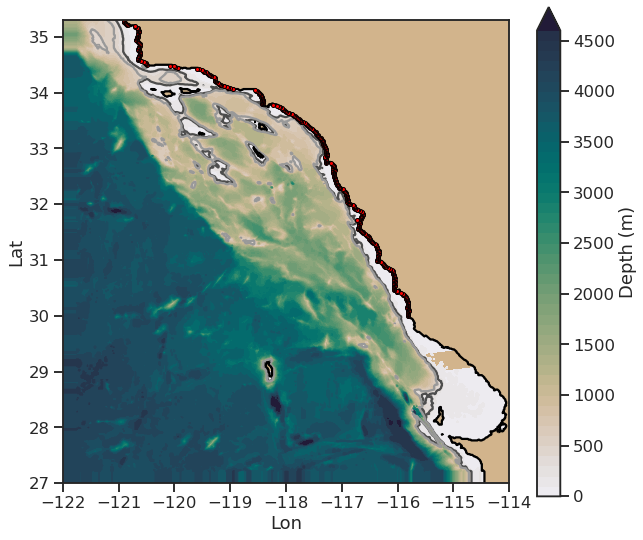

In [6]:
ini_lat_ind = 220 

sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(lon_inds[ini_lat_ind:],range(len(lon_inds[ini_lat_ind:]))):
    ax.plot(LON[0,nx-ii-1],LAT[jj+ini_lat_ind,0],'o', 
            markersize=4, color='r', markeredgecolor='k')
    print('Depth at cell is %1.2f m' % (depth[jj+ini_lat_ind,nx-ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)

There are some points missing along the coast that have the same lat. Fix that later.Make a lat_ind array and lon_ind array and add those points.

In [7]:
lat_inds = np.argmax(np.squeeze(hFacCSVB[0,::-1,:].data), axis=0)

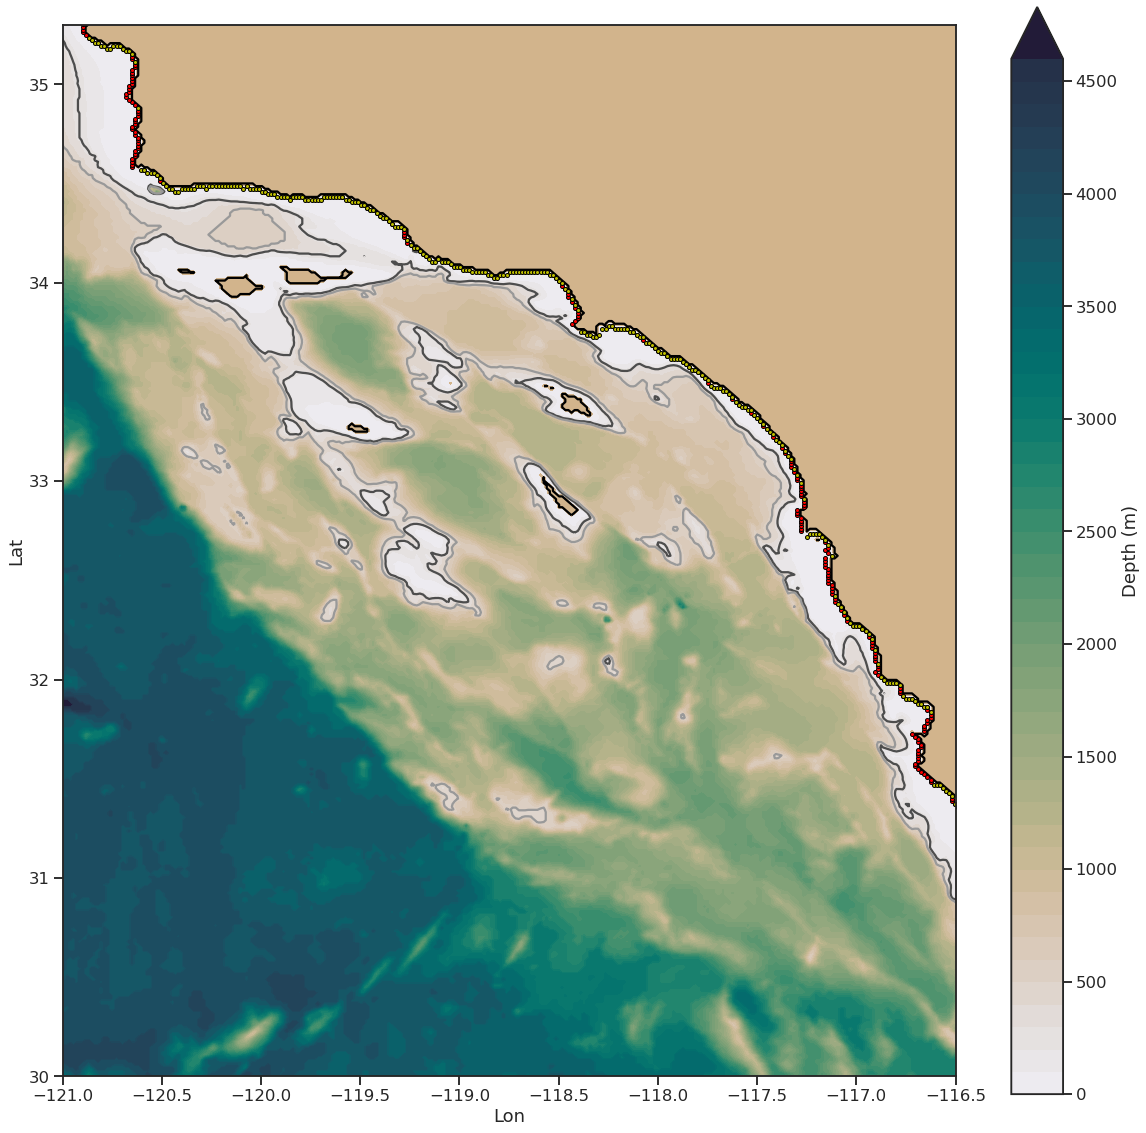

In [8]:
ini_lon_ind = 50 

sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

# cells along coast(ish)
for ii,jj in zip(lon_inds[ini_lat_ind:],range(len(lon_inds[ini_lat_ind:]))):
    ax.plot(LON[0,nx-ii-1],LAT[jj+ini_lat_ind,0],'o', 
            markersize=4, color='r', markeredgecolor='k')

# cells along coast(ish)
for ii,jj in zip(lat_inds[ini_lon_ind:],range(len(lat_inds[ini_lon_ind:]))):
    ax.plot(LON[0,jj+ini_lon_ind],LAT[ny-ii-1,0],'o', 
            markersize=4, color='y', markeredgecolor='k')


ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(-121, -116.5)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

### Hovmöller 

In [9]:
# Distance along the coast (haversine)
lat1 = 20
lon1 = -114
lat2 = 21
lon2 = -114

def distance(lat1,lon1,lat2,lon2):
    '''Distance Haversine using formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [10]:
lon_inds_fix = (np.ones_like(lon_inds[ini_lat_ind:])*nx-
                lon_inds[ini_lat_ind:]-
                np.ones_like(lon_inds[ini_lat_ind:]))

In [11]:
dist_array = np.zeros(len(lon_inds_fix))

for jj in range(1,len(lon_inds_fix)):
    lat1 = lat[ini_lat_ind+jj-1]
    lon1 = lon[lon_inds_fix[jj-1]]
    lat2 = lat[ini_lat_ind+jj]
    lon2 = lon[lon_inds_fix[jj]]
    dist_array[jj]=  distance(lat1, lon1, lat2, lon2)

In [12]:
dist_cummul = np.cumsum(dist_array)

In [13]:
ssh = np.zeros((nt,len(lon_inds_fix)))

for ii,jj in zip(lon_inds_fix, range(len(lon_inds_fix))):
    ssh[:,jj] = ds['ETAN'][:,jj+ini_lat_ind,ii]

In [14]:
print('%1.1e' %distance(lat1,lon1,lat2,lon2))

2.1e+00


Text(0.5, 1.0, 'SVB run')

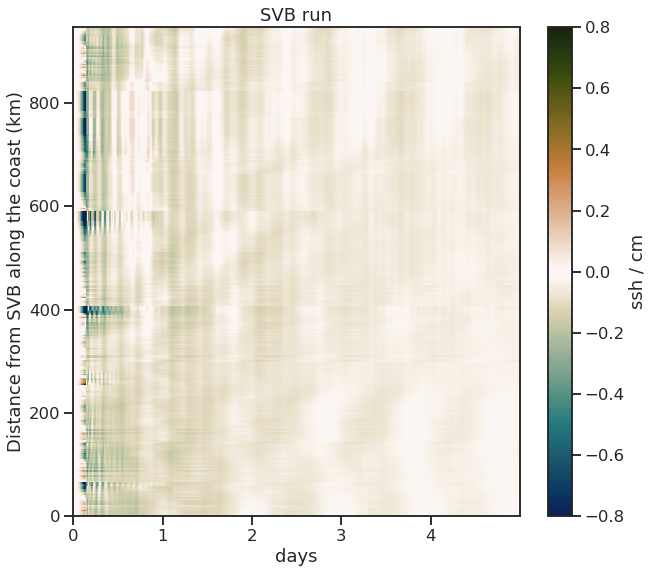

In [15]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run')

Text(0.5, 1.0, 'SVB run')

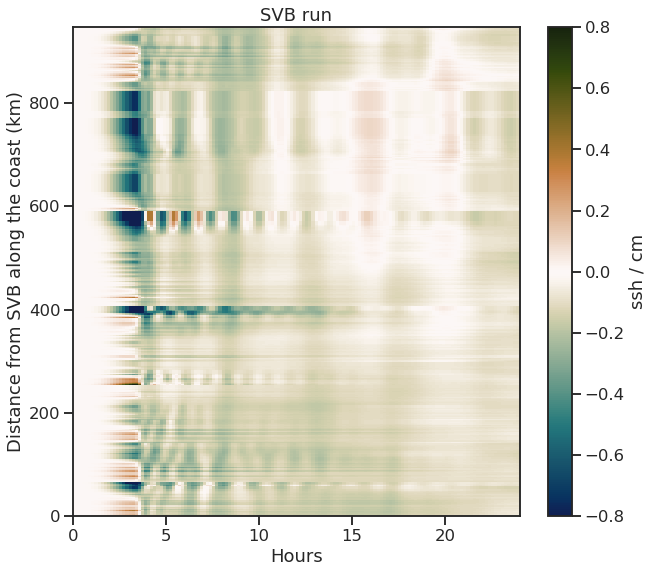

In [16]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB run')

## No SVB run

In [17]:
ssh_NOB = np.zeros((nt,len(lon_inds_fix)))

for ii,jj in zip(lon_inds_fix, range(len(lon_inds_fix))):
    ssh_NOB[:,jj] = ds2['ETAN'][:,jj+ini_lat_ind,ii]

Text(0.5, 1.0, 'No SVB run')

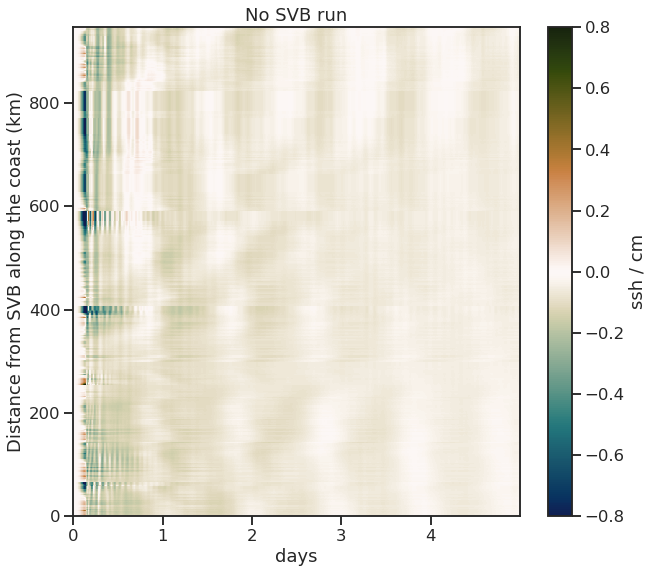

In [18]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('No SVB run')

Text(0.5, 1.0, 'No SVB run')

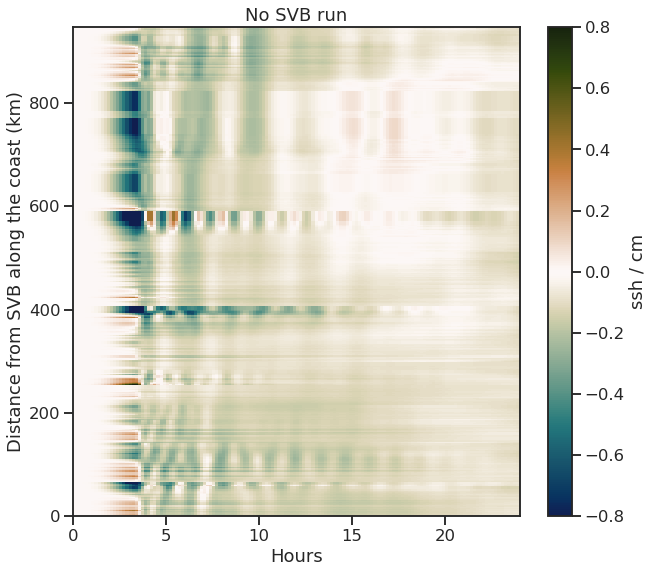

In [19]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('No SVB run')

## Bay minus no Bay 

Text(0.5, 1.0, 'SVB-No SVB')

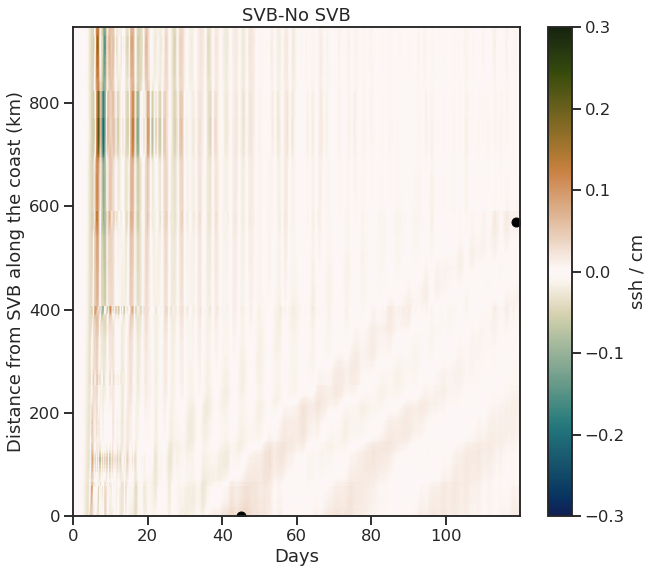

In [30]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.plot(45,0,'ko')
ax.plot(119,570, 'ko')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Days')
ax.set_title('SVB-No SVB')

Text(0.5, 1.0, 'SVB-No SVB')

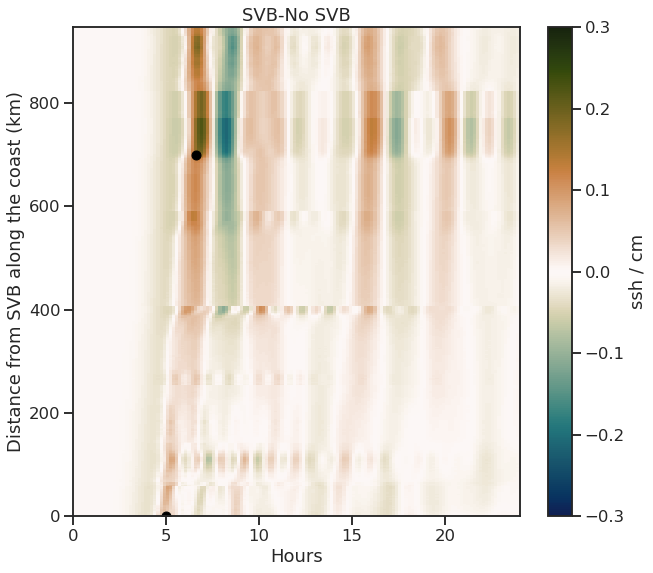

In [23]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

In [31]:
570/(119-45)

7.702702702702703

In [32]:
7.7/3.6

2.138888888888889

In [33]:
np.sqrt(9.81*200)

44.294469180700204

1505.3119673802241